#### 자연어 처리
- 수집
- 정제 및 토큰화
- 불용어 / 구두점 제거
- 단어 사전 => 토큰 : 숫자 맵핑 진행
- 데이터의 수치화


[1] 모듈 로딩 및 데이터 준비<hr>

In [61]:
from nltk.tokenize import word_tokenize, sent_tokenize,wordpunct_tokenize


In [62]:
# 데이터 준비
TEXT_FILE = '../data/corpus_data.txt'
TEXT_FILE


'../data/corpus_data.txt'

In [63]:
# 파일에서 데이터 추출 => 'rt' 파일 읽기 기본값
with open(TEXT_FILE, mode = 'rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data100=f.read(100)
    f.seek(0)
    text_data = f.read()

In [64]:
len(text_data), len(text_data100)

(42053, 100)

In [65]:
# 파일에서 데이터 추출 => 'rt' 파일 읽기 기본값
# 라인 단위로 읽기 => readline()

## 라인 단위로 읽어오기 때문에 전부 가져오려면 반복문 돌려야 됨

with open(TEXT_FILE, mode = 'rt', encoding='utf-8') as f:
    all_data =[]
    while True :
        # 한 줄씩('\n' 인식) 읽기
        text_data=f.readline()
        if not text_data :
            break
        else :
            all_data.append(text_data)


In [66]:
print(f'text_data : {len(text_data)}개, {text_data}')
print(f'all_data : {len(all_data)}개, {all_data}')

text_data : 0개, 
all_data : 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian ne

In [67]:
# 파일에서 데이터 추출 => 'rt' 파일 읽기 기본값
# 라인 단위로 전체 읽기 => readlines()

## 전체 읽기 실행하면 전체 읽어서 리스트에 담아서 반환해줌, while문 필요없음

with open(TEXT_FILE, mode = 'rt', encoding='utf-8') as f:
        # 한 줄씩('\n' 인식) 전체 읽어서 리스트에 저장
        text_data=f.readlines()
        

In [68]:
print(f'text_data : {len(text_data)}개, {text_data}')
for text in text_data : 
    print(text)

text_data : 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offeri

[2] 데이터 전처리<hr>

- 줄바꿈 문자 처리

In [69]:
all_text=[]
for text in text_data[::-1] :
    text = text.replace('\n','') 
    if len(text) : all_text.append(text)
print(f'all_text => {len(all_text)}개')

all_text => 87개


- 대소문자 통일

In [70]:
all_text=[text.lower() for text in all_text]

In [71]:
## ( a for a in b ) : 제너레이터(Generator) 생성
## 반복문으로 읽어야 함
all_text=(text.lower() for text in all_text)
all_text

<generator object <genexpr> at 0x000001FA27C6D6D0>

In [72]:
# 제너레이터 추출해서 for문으로 읽어 옴
# for _ in all_text :
#     print(_)

- 토큰화

In [73]:
all_tokens=[]
for text in all_text :
    print(wordpunct_tokenize(text))
    all_tokens.append(wordpunct_tokenize(text))

['woodruff', 'submits', 'that', 'the', 'legal', 'verdicts', ',', 'although', 'fair', 'given', 'the', 'evidence', 'before', 'the', 'courts', ',', 'have', 'not', 'fully', 'resolved', 'the', '"', 'great', 'doubt', '"', 'that', 'cockburn', 'admitted', 'hung', 'over', 'the', 'case', '.', 'woodruff', 'wrote', 'in', '1957', ':', '"', 'probably', 'for', 'ever', ',', 'now', ',', 'its', 'key', 'long', 'since', 'lost', '...', 'a', 'mystery', 'remains', '".[', '132', ']', 'a', '1998', 'article', 'in', 'the', 'catholic', 'herald', 'suggested', 'that', 'dna', 'profiling', 'might', 'resolve', 'the', 'mystery', '.[', '133', ']', 'the', 'enigma', 'has', 'launched', 'numerous', 'retellings', 'of', 'the', 'story', 'in', 'book', 'and', 'film', ',', 'including', 'the', 'short', 'story', '"', 'tom', 'castro', ',', 'the', 'implausible', 'imposter', '"', 'from', 'jorge', 'luis', 'borges', "'", 's', 'universal', 'history', 'of', 'infamy', ',[', '134', ']', 'and', 'david', 'yates', "'", 's', '1998', 'film', 'th

In [74]:
print(f'tokens 개수 : {len(all_tokens)}개')

tokens 개수 : 87개


토큰화 이후 불용어 및 구두점 제거 해야 하는데 하나의 for문으로 제거하기!

- 불용어 & 구두점 제거

In [80]:
## 불용어 추출
from nltk.corpus import stopwords   # ==> 불용어
import string                       # ==> 구두점 읽기

eng_stopwords = stopwords.words('english')
pun=list(string.punctuation)

In [89]:
# 불용어, 구두점, 길이 짧은 토큰 삭제
for tokenList in all_tokens :
    for token in tokenList[::-1] :
        if (token in eng_stopwords) or (token in pun) or (len(token) <=2) :
            tokenList.remove(token) 
        if token.isnumeric() :
            tokenList.remove(token)

In [90]:
for tokenList in all_tokens :
    print(tokenList)

['woodruff', 'submits', 'legal', 'verdicts', 'although', 'fair', 'given', 'evidence', 'courts', 'fully', 'resolved', 'great', 'doubt', 'cockburn', 'admitted', 'hung', 'case', 'woodruff', 'wrote', 'probably', 'ever', 'key', 'long', 'since', 'lost', '...', 'mystery', 'remains', '".[', 'article', 'catholic', 'herald', 'suggested', 'dna', 'profiling', 'might', 'resolve', 'mystery', 'enigma', 'launched', 'numerous', 'retellings', 'story', 'book', 'film', 'including', 'short', 'story', 'tom', 'castro', 'implausible', 'imposter', 'jorge', 'luis', 'borges', 'universal', 'history', 'infamy', 'david', 'yates', 'film', 'tichborne', 'claimant', 'thus', 'woodruff', 'concludes', 'man', 'lost', 'still', 'walks', 'history', 'name', 'common', 'voice', 'day', 'accorded', 'claimant', '".[']
['attempts', 'made', 'reconcile', 'troubling', 'uncertainties', 'contradictions', 'within', 'case', 'explain', 'degree', 'facial', 'resemblance', 'even', 'cockburn', 'accepted', 'claimant', 'tichborne', 'family', 'ons

- 단어별 빈도수 계싼

In [92]:
# 토큰을 키로 해서 빈도수 저장
token_freqs={}

# 라인(줄)별 토큰을 읽어서 빈도 체크
for tokenList in all_tokens :
    for token in tokenList :
        # 토큰 키가 존재하지 않으면 키로 추가 후 1로 설정
        if token not in token_freqs :
            token_freqs[token]=1
        # 이미 존재하는 토큰 키이면 값을 1 증가
        else :
            token_freqs[token] += 1

In [94]:
### 빈도별로 몇 개의 단어가 존재하는지 체크
token_freqs.items()

dict_items([('woodruff', 5), ('submits', 1), ('legal', 12), ('verdicts', 1), ('although', 14), ('fair', 3), ('given', 5), ('evidence', 12), ('courts', 4), ('fully', 1), ('resolved', 1), ('great', 2), ('doubt', 2), ('cockburn', 10), ('admitted', 1), ('hung', 1), ('case', 23), ('wrote', 4), ('probably', 1), ('ever', 2), ('key', 2), ('long', 5), ('since', 4), ('lost', 7), ('...', 2), ('mystery', 2), ('remains', 2), ('".[', 11), ('article', 1), ('catholic', 4), ('herald', 1), ('suggested', 3), ('dna', 1), ('profiling', 1), ('might', 6), ('resolve', 1), ('enigma', 1), ('launched', 4), ('numerous', 2), ('retellings', 1), ('story', 4), ('book', 1), ('film', 4), ('including', 9), ('short', 2), ('tom', 1), ('castro', 15), ('implausible', 1), ('imposter', 1), ('jorge', 1), ('luis', 1), ('borges', 1), ('universal', 1), ('history', 4), ('infamy', 1), ('david', 1), ('yates', 1), ('tichborne', 97), ('claimant', 115), ('thus', 5), ('concludes', 1), ('man', 4), ('still', 1), ('walks', 1), ('name', 14)

In [100]:
# 빈도수별로 단어 또는 단어 개수 저장
freqsDict={}
for k,v in token_freqs.items() :
    if v not in freqsDict :
        # 단어를 저장하는 경우
        # freqsDict[v] = [k]
        # 단어 개수 저장
        # freqsDict[v] = 1
        # 두개 다 한번에
        freqsDict[v]=[1,[k]]
    else :
        freqsDict[v][1].append(k)
        freqsDict[v][0] += 1
print(freqsDict)

{5: [43, ['woodruff', 'given', 'long', 'thus', 'however', 'pounds', 'small', 'failed', 'allowed', 'association', 'british', 'public', 'popular', 'class', 'february', 'general', 'year', 'declared', 'perjury', 'january', 'included', 'taken', 'melbourne', 'time', 'melipilla', 'heard', 'though', 'team', 'months', 'appeal', 'meet', 'missing', 'face', 'asked', 'south', 'america', 'said', 'income', 'valparaíso', 'born', 'foster', 'alfred', 'henriette']], 1: [1054, ['submits', 'verdicts', 'fully', 'resolved', 'admitted', 'hung', 'probably', 'article', 'herald', 'dna', 'profiling', 'resolve', 'enigma', 'retellings', 'book', 'tom', 'implausible', 'imposter', 'jorge', 'luis', 'borges', 'universal', 'infamy', 'david', 'yates', 'concludes', 'still', 'walks', 'voice', 'day', 'accorded', 'reconcile', 'troubling', 'uncertainties', 'contradictions', 'explain', 'facial', 'illegitimate', 'grandfather', 'alternative', 'half', 'brothers', 'versions', 'crime', 'killing', 'assuming', 'agnes', 'killed', 'disc

In [101]:
sorted(freqsDict.items(), reverse=True)

[(115, [1, ['claimant']]),
 (97, [1, ['tichborne']]),
 (62, [1, ['roger']]),
 (41, [1, ['orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'sir']]),
 (22, [2, ['arthur', 'kenealy']]),
 (19, [1, ['lady']]),
 (18, [3, ['years', 'court', 'son']]),
 (16, [1, ['trial']]),
 (15, [1, ['castro']]),
 (14, [3, ['although', 'name', 'wagga']]),
 (13, [6, ['australia', 'england', 'would', 'doughty', 'may', 'one']]),
 (12, [2, ['legal', 'evidence']]),
 (11,
  [8,
   ['".[',
    'henry',
    'james',
    'edward',
    'witnesses',
    'former',
    'information',
    'london']]),
 (10, [5, ['cockburn', 'accepted', 'support', 'bogle', 'civil']]),
 (9, [4, ['including', 'died', 'john', 'ship']]),
 (8,
  [12,
   ['identity',
    'could',
    'details',
    'supporters',
    'first',
    'later',
    'two',
    'became',
    'hawkins',
    'wapping',
    'ballantine',
    'thomas']]),
 (7,
  [19,
   ['lost',
    'made',
    'onslow',
    'mary',
    'daughter',
    'william',
    'sydney',
    'remai

- [3] 단어 집합 / 단어 사전 만들기
    * 단어 : 숫자 맵핑
    * 나의 데이터셋을 숫자로 변환하기 위한 인코딩(Encodning)표
    * 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 => 패딩
        - 패딩에 사용되는 토큰 'PAD' : 0
    * 테스트 또는 검증에 입력되는 텍스트 ==> 단어사전 / 집합에 존재하지 않는 단어
        - 존재하지 않는 토큰 'OOV' 또는 'UNK' 키, 값 1                               

In [107]:
## 빈도가 높게 나오는 순서대로 단어 정렬
#                  (k,v) -------------->x
storedTokens = sorted(token_freqs.items(), key=lambda x: x[1], reverse=True)

In [108]:
# 단어 사전 생성 및 초기화
## 특수토큰 'PAD', 'OOV' 또는 'UNK' 
PAD_TOKEN, OOV_TOKEN = 'PAD','OOV' 
vocab={'PAD':0, 'OOV':1}

In [114]:
# 데이터 코퍼스에서 추출된 토큰(단어)들
for idx, tk in enumerate(storedTokens,2) :
    vocab[tk[0]] = idx
print(vocab)

{'PAD': 0, 'OOV': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'orton': 5, 'family': 6, 'case': 7, 'sir': 8, 'arthur': 9, 'kenealy': 10, 'lady': 11, 'years': 12, 'court': 13, 'son': 14, 'trial': 15, 'castro': 16, 'although': 17, 'name': 18, 'wagga': 19, 'australia': 20, 'england': 21, 'would': 22, 'doughty': 23, 'may': 24, 'one': 25, 'legal': 26, 'evidence': 27, '".[': 28, 'henry': 29, 'james': 30, 'edward': 31, 'witnesses': 32, 'former': 33, 'information': 34, 'london': 35, 'cockburn': 36, 'accepted': 37, 'support': 38, 'bogle': 39, 'civil': 40, 'including': 41, 'died': 42, 'john': 43, 'ship': 44, 'identity': 45, 'could': 46, 'details': 47, 'supporters': 48, 'first': 49, 'later': 50, 'two': 51, 'became': 52, 'hawkins': 53, 'wapping': 54, 'ballantine': 55, 'thomas': 56, 'lost': 57, 'made': 58, 'onslow': 59, 'mary': 60, 'daughter': 61, 'william': 62, 'sydney': 63, 'remained': 64, 'found': 65, 'april': 66, 'much': 67, 'katherine': 68, 'called': 69, 'bella': 70, 'june': 71, 'many': 72, '

In [119]:
## 텍스튼 문장 ===> 수치화 [인코딩]
encodingData = []
for tokenList in all_tokens :
    # 1개 문장 인코딩
    sent=[]
    print(f'문 장 : {tokenList}')
    for token in tokenList :
        sent.append(vocab[token])
    # 인코딩 된 문장 저장
    encodingData.append(sent)
    print(f'==>인코딩 : {sent}')
    

문 장 : ['woodruff', 'submits', 'legal', 'verdicts', 'although', 'fair', 'given', 'evidence', 'courts', 'fully', 'resolved', 'great', 'doubt', 'cockburn', 'admitted', 'hung', 'case', 'woodruff', 'wrote', 'probably', 'ever', 'key', 'long', 'since', 'lost', '...', 'mystery', 'remains', '".[', 'article', 'catholic', 'herald', 'suggested', 'dna', 'profiling', 'might', 'resolve', 'mystery', 'enigma', 'launched', 'numerous', 'retellings', 'story', 'book', 'film', 'including', 'short', 'story', 'tom', 'castro', 'implausible', 'imposter', 'jorge', 'luis', 'borges', 'universal', 'history', 'infamy', 'david', 'yates', 'film', 'tichborne', 'claimant', 'thus', 'woodruff', 'concludes', 'man', 'lost', 'still', 'walks', 'history', 'name', 'common', 'voice', 'day', 'accorded', 'claimant', '".[']
==>인코딩 : [92, 611, 26, 612, 17, 215, 93, 27, 135, 613, 614, 328, 329, 36, 615, 616, 7, 92, 136, 617, 330, 331, 94, 137, 57, 332, 333, 334, 28, 618, 138, 619, 216, 620, 621, 76, 622, 333, 623, 139, 335, 624, 140,

- [4] 패딩(Padding)
* 길이가 다른 문장들의 길이를 일치시키기
    - 가장 긴문장 기준으로 나머지 문장들은 PAD 토큰 채우기
    - 개발자 지정 길이를 기준으로 문장들의 길이 조절
        * 지정 길이보다 긴 경우 : 자르기(앞부분 or 뒷부분 중 선택)
        * 지정 길이보다 짦은 경우 : PAD 토큰으로 채우기

In [122]:
datalen=[len(sent) for sent in encodingData]

In [123]:
import matplotlib.pyplot as plt

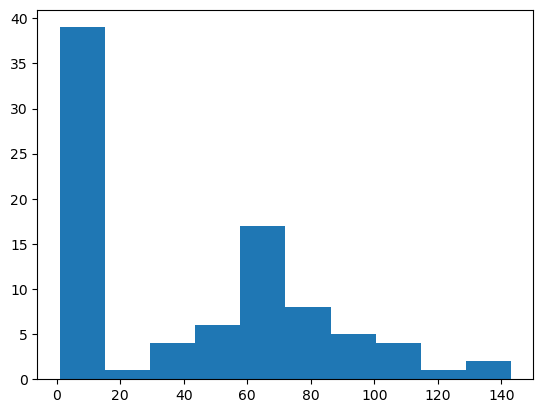

In [126]:
plt.hist(datalen)
plt.show()

In [128]:
## 기준 길이
MAX_LENGTH = max(datalen)

MAX_LENGTH

143

In [143]:
### [1] 가장 긴 문장 길이 기준
for idx, sent in enumerate(encodingData) :
    cur_length=len(sent)
    if cur_length < MAX_LENGTH :
        encodingData[idx]=sent+([0] *(MAX_LENGTH-cur_length))
    else : 
        # 앞부분 제거 시
        encodingData[idx] = sent[cur_length-MAX_LENGTH :]
        # 뒷부분 제거 시
        # encodingData[idx] = sent[:MAX_LENGTH]

In [135]:
for _ in encodingData[:3] :
    print(len(_),_)

143 [92, 611, 26, 612, 17, 215, 93, 27, 135, 613, 614, 328, 329, 36, 615, 616, 7, 92, 136, 617, 330, 331, 94, 137, 57, 332, 333, 334, 28, 618, 138, 619, 216, 620, 621, 76, 622, 333, 623, 139, 335, 624, 140, 625, 141, 41, 336, 140, 626, 16, 627, 628, 629, 630, 631, 632, 142, 633, 634, 635, 141, 3, 2, 95, 92, 636, 143, 57, 637, 638, 142, 18, 217, 639, 640, 641, 2, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [144, 58, 642, 643, 644, 645, 145, 7, 646, 337, 647, 218, 338, 36, 37, 2, 3, 6, 59, 216, 146, 5, 77, 339, 340, 60, 341, 648, 61, 8, 29, 3, 4, 3, 649, 650, 140, 60, 341, 219, 30, 3, 342, 5, 4, 651, 652, 653, 5, 4, 343, 654, 20, 5, 655, 4, 656, 45, 2, 61, 60, 147, 220, 344, 60, 657, 221, 148, 222, 658, 9, 5, 95, 46, 659, 47, 223, 12, 224, 27, 660, 344, 225, 661, 45, 3, 61, 662, 342, 663, 345, 149, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [140]:
MAX_LENGTH = 5
a=[1,2,3,4,5,6,7,8,9]
a[:MAX_LENGTH]

a[:MAX_LENGTH], a[len(a)-MAX_LENGTH:]

[1, 2, 3, 4, 5]